In [20]:
import networkx as nx
import gzip
import ujson as json
import itertools
# import treelib
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import from_networkx
from torch_geometric.loader import DataLoader
import pandas as pd

In [2]:
df=pd.read_csv("irmapreprocessed.csv")
df

,id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,905625009430949888,905625009430949888_0,informative,0.6721,informative,1.0000,infrastructure_and_utility_damage,0.6721,infrastructure_and_utility_damage,1.0000,...,316,756,4,Jamaica,Cecile,slimjamaican,40303,NaN,NaN,False
1,905625059326353409,905625059326353409_0,informative,0.6545,informative,1.0000,other_relevant_information,0.6545,other_relevant_information,1.0000,...,53361,1999,408,"Washington, DC",Steve Rudin 7News,SteveRudin7News,30933,NaN,http://wjla.com/station/people/steve-rudin,True
2,905625064451833856,905625064451833856_0,informative,0.6629,informative,0.6392,infrastructure_and_utility_damage,0.6629,other_relevant_information,0.6392,...,34,179,0,Toronto,Christine 🌸,kiki_chiquita,490,NaN,NaN,False
3,905625073628975106,905625073628975106_0,informative,1.0000,informative,1.0000,other_relevant_information,1.0000,other_relevant_information,1.0000,...,597,2962,9,"Florida, USA",Laura Dill,Perspectvz,62816,NaN,NaN,False
4,905625088300654592,905625088300654592_0,informative,1.0000,informative,1.0000,other_relevant_information,1.0000,other_relevant_information,1.0000,...,2220,4298,68,Chile,Edhagadol,edhagadol,59091,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,910270036861886465,910270036861886465_0,informative,1.0000,informative,1.0000,other_relevant_information,1.0000,infrastructure_and_utility_damage,1.0000,...,406,243,8,NaN,On Weather,OnWeather1,71804,NaN,NaN,False
3516,910270462822895617,910270462822895617_0,informative,1.0000,not_informative,0.3779,other_relevant_information,1.0000,not_humanitarian,0.3779,...,591,61,23,"Kingsland, GA",Camden County EMA,CamdenCountyEMA,4635,NaN,https://www.camdencountyga.gov/81/Emergency-Ma...,False
3517,910270554812317697,910270554812317697_0,informative,0.6376,informative,0.6445,other_relevant_information,0.6376,other_relevant_information,0.6445,...,1090,709,29,(223/717),Nikhil Menon,multimenon,41946,NaN,https://nikhilmenon.in,False
3518,910270595262291968,910270595262291968_0,not_informative,0.6667,not_informative,1.0000,not_humanitarian,0.6667,not_humanitarian,1.0000,...,1533,3859,183,"Wewoka, OK",Jake Davis,WewokaChronicle,208925,NaN,http://writers.work/jakedavis,False


In [3]:
df.dtypes

id                              int64
image_id                       object
text_info                      object
text_info_conf                float64
image_info                     object
image_info_conf               float64
text_human                     object
text_human_conf               float64
image_human                    object
image_human_conf              float64
image_damage                   object
image_damage_conf             float64
tweet_text                     object
image_url                      object
image_path                     object
coordinates                    object
created_at                     object
hashtags                       object
media                          object
urls                           object
favorite_count                  int64
in_reply_to_screen_name        object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
lang                           object
place                          object
possibly_sen

In [4]:
df2=pd.read_csv('CrisisMMD_v2.csv')
df2

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Wed Sep 06 04:38:00 +0000 2017,NaN,NaN,https://twitter.com/edgarmvega/status/90456271...,0,905288952285995008,NaN,NaN,NaN,...,169,213,0,NaN,mass ✨,massierey,5673,NaN,NaN,False
1,NaN,Wed Sep 06 04:37:48 +0000 2017,NaN,NaN,NaN,0,905288900750475264,NaN,NaN,NaN,...,4125,590,5,24 ♡ AZ ♡ She/Her,Cowgirl Erin ♡,Hawaiiantrash_,58537,NaN,http://fourloko.com,False
2,NaN,Wed Sep 06 04:37:48 +0000 2017,NaN,NaN,NaN,0,905288902851923969,NaN,NaN,NaN,...,385,1401,10,"Imperial Beach, CA",🌫 Isabel 🌫,IsabelNicole920,78560,NaN,NaN,False
3,NaN,Wed Sep 06 04:37:43 +0000 2017,NaN,NaN,NaN,0,905288881708441602,michaelFhurley,9.052886e+17,113136762.0,...,1922,1139,49,NaN,Vibrantankles,Vibrantankles,259017,NaN,NaN,False
4,NaN,Wed Sep 06 04:37:42 +0000 2017,NaN,NaN,NaN,0,905288875396009984,NaN,NaN,NaN,...,932,283,15,NaN,♡☆‧₊˚cherry ˚₊‧☆♡,cherrydiik,145325,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332568,NaN,Thu Sep 21 17:33:11 +0000 2017,HurricaneIrma,NaN,NaN,0,910919851383779328,NaN,NaN,NaN,...,2402,923,33,male maldives,Shaheem Ismail Najeeb,najeebshahym,47864,NaN,https://unchartedmaldives.com,False
1332569,NaN,Thu Sep 21 17:32:30 +0000 2017,SWFL HurricaneIrma,NaN,http://nplsne.ws/2xizxGR,0,910919680281505793,NaN,NaN,NaN,...,2222,5001,74,"Florida, USA",Calusa Waterkeeper,calusawater,43545,NaN,NaN,False
1332570,NaN,Thu Sep 21 17:32:16 +0000 2017,NaN,NaN,NaN,0,910919623092121600,NaN,NaN,NaN,...,449,1698,5,NaN,lysf_captain underpants the shovel warrior,lysf_cutsw,35348,NaN,NaN,False
1332571,NaN,Thu Sep 21 17:32:35 +0000 2017,NaN,NaN,http://sherwoodparkweather.com/hurricane-irma-...,0,910919700518965248,NaN,NaN,NaN,...,495,9,9,Edmonton Alberta,Bunkers Live Edmonton,BunkersLive,216480,NaN,https://bunkerslive.ca/live-music,False


In [5]:
df2['in_reply_to_status_id']=df2['in_reply_to_status_id'].fillna(0).astype(int)

In [6]:
d={}
import math
for i,row in df2.iterrows():
    if not math.isnan(row['in_reply_to_status_id']):
        d[row['in_reply_to_status_id']]=row["id"]
        

In [7]:
d

{0: 910919800284696576,
 905288588149055488: 905288881708441602,
 905282925419253760: 905289020619583488,
 905288696236318720: 905288971688845312,
 905125113250676736: 905289292729155585,
 905287472850112512: 905289410786287616,
 905287572590657536: 905289545410895874,
 905285412310147072: 905289546593652737,
 905288080256577536: 905289540973326336,
 905286546609332224: 905289836529156096,
 905289169626439680: 905289527262138368,
 905272350245097472: 905289517598433282,
 904562712998322176: 905457642193149952,
 905289384710332416: 905289721928134657,
 905275716291493888: 905289848835252226,
 905283198774640640: 905346912471146496,
 905261772994686976: 905290156940328961,
 905289841352605696: 905290095611269120,
 905287455829630976: 905290280013893634,
 905290055924801536: 905290419159932928,
 905203461398028288: 905290360426987521,
 905290419763908608: 905290513959591937,
 905288774124482560: 905290616015290370,
 905102636600352768: 905290613159055360,
 905284232364400640: 905290691529

In [8]:
edges={}
for i,row in df.iterrows():
    if row['id'] and row['id'] in d:
        
        edges[row['id']]=d[row['id']]
len(edges)

17

In [9]:
vals=d.values()
for i in d.keys():
    if i in vals:
        edges[i]=d[i]


In [10]:
len(edges)

438

In [11]:
df2['in_reply_to_status_id'].count()

1332573

In [12]:
len(set(list(edges.values())))

438

In [21]:
G=nx.DiGraph()


In [22]:
for k in edges:
    G.add_edge(k,edges[k])


In [23]:
len(G.nodes)

841

In [24]:
UG = G.to_undirected()


l=sorted(nx.connected_components(UG), key = len, reverse=True)

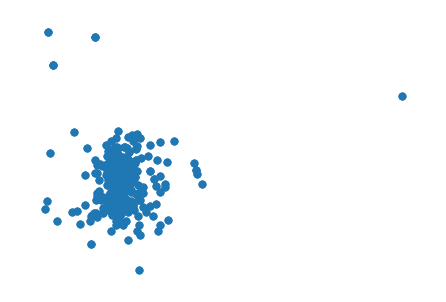

In [25]:
nx.draw_spectral(UG,node_size=50)

In [28]:
l=[c for c in sorted(nx.connected_components(UG), key=len, reverse=True)]

In [29]:
S = [G.subgraph(c).copy() for c in l]

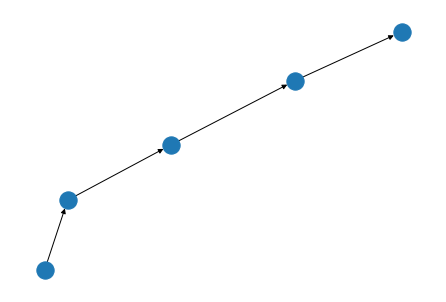

In [31]:
nx.draw(S[0],label=True)